## COLEGIO DE CIENCIAS E INGENIERÍA
## INGENIERIA INDUSTRIAL
## IIN-3007E Business Analytics
### NRC: 2383
### Project - Submission 1
### First Semester 2024-2025
 
#### Iván Olaizola  00325325, 
#### Mateo Herrera 00329885, 
#### Maria Paula Andrade 00325614

#### Gabriela Baldeón

#### November 11, 2024

# 0. Libraries and database reading

In [27]:
#Import necessary libraries
#!pip install xgboost


import pandas as pd
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, auc, precision_score, recall_score
)
from IPython.display import display
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import uniform, randint, zscore
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
from sklearn import tree
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import warnings

warnings.filterwarnings('ignore')

#If you need to install imblearn use the next line of code
#!pip install -U imbalanced-learn
#pip install -U scikit-learn

In [2]:
df = pd.read_excel('cardiovascular_disease.xlsx') # read excel document (store it into a dataframe)

# 1. Exploratory Data Analysis (EDA)

## 1.1 Give a general description of the database, including size, data types, null/blank values, outliers, atypical values.

In [3]:
#Show the first register of the dataframe
print("\nFirst columns of the DataFrame:")
display(df.head()) #Display function helps to print the arrays as tables (enhance visualization)

# Obtain the size of the dataframe
print("\nSize of teh DataFrame (rows, columns):")
display(pd.DataFrame([df.shape], columns=['Rows', 'Columns']))

# Verify the datatypes on each colum
print("\nData Types on Each Column:")
display(pd.DataFrame(df.dtypes, columns=['Data Type']).transpose()) #Transpose the table to see all the datatypes

# Detect null values and show the quantity of them on each column
print("\nNull Values on Each Column:")
null_values = pd.DataFrame(df.isnull().sum(), columns=['Null Values']).transpose() #identify null value on dataframe and sum its value
display(null_values)

# use a for loop to identify on each column the values that are unique, that way we can know if there are values that shouldnt be on the column
for column in df.columns:
    print(f"\nUnique values in {column}: {df[column].unique()}")


First columns of the DataFrame:


,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0



Size of teh DataFrame (rows, columns):


,Rows,Columns
0,308854,19



Data Types on Each Column:


,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption
Data Type,object,object,object,object,object,object,object,object,object,object,object,int64,float64,float64,object,int64,object,int64,int64



Null Values on Each Column:


,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption
Null Values,0,0,101,0,0,0,3088,0,0,0,0,0,0,0,0,0,0,0,0



Unique values in General_Health: ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']

Unique values in Checkup: ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']

Unique values in Exercise: ['No' 'Yes' nan]

Unique values in Heart Disease: ['No' 'Yes' 'e']

Unique values in Skin Cancer: ['No' 'Yes' 'dsfg' 'wet' '12*lklñ´fg' 'q345345' 'serter-89' 'dfg 025'
 'dfgklñfg-' 'sertret-8']

Unique values in Other Cancer: ['No' 'Yes' 'dsgw45']

Unique values in Depression: ['No' 'Yes' nan]

Unique values in Diabetes: ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']

Unique values in Arthritis: ['Yes' 'No']

Unique values in Sex: ['Female' 'Male' 'Non-Binary']

Unique values in Age Category: ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']

Unique values in Height (cm): [150 165 163 180 191 183 175 160 168 178 152 157 188 185 170 173 155

In [4]:
# Define the ranks for the General Health variable
health_rank = {
    'Excellent': 5,
    'Very Good': 4,
    'Good': 3,
    'Fair': 2,
    'Poor': 1
}
# Apply the mapping to transform General_Health into an ordinal variable
df['General_Health'] = df['General_Health'].map(health_rank)

# Define the ranks for the Checkup variable
checkup_rank = {
    'Within the past year': 4,
    'Within the past 2 years': 3,
    'Within the past 5 years': 2,
    '5 or more years ago': 1,
    'Never': 0 
}
# Apply the mapping to transform Checkup into an ordinal variable
df['Checkup'] = df['Checkup'].map(checkup_rank)

# Define the ranks for the Age Category variable
age_rank = {
    '80+' : 13,
    '75-79' : 12,
    '70-74' : 11,
    '65-69' : 10,
    '60-64' : 9,
    '55-59' : 8,
    '50-54' : 7,
    '45-49' : 6,
    '40-44' : 5,
    '35-39' : 4,
    '30-34' : 3,
    '25-29' : 2,
    '18-24' : 1
}
# Apply the mapping to transform Age Category into an ordinal variable
df['Age Category'] = df['Age Category'].map(age_rank)

# Eliminating information other than 'Yes' or 'No' within observations in the Diabetes column
df['Diabetes'] = df['Diabetes'].map(lambda x: 'Yes' if str(x).startswith('Yes') else ('No' if str(x).startswith('No') else x)) #(___)

# Columns with 'Yes' or 'No' values only
binary_columns = ['Exercise', 'Heart Disease', 'Skin Cancer', 'Other Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Smoking History']

# Replace any value that is not 'Yes' or 'No' with NaN in these columns
for column in binary_columns:
    df[column] = df[column].apply(lambda x: 1 if x == 'Yes' else(0 if x == 'No' else np.nan))
    
# For Fruit Consumption, replace any non-numeric value with NaN
df['Fruit Consumption'] = pd.to_numeric(df['Fruit Consumption'], errors='coerce')

In [5]:
#Show the first register of the dataframe
print("\nFirst columns of the DataFrame:")
display(df.head()) #display is used to get a table that better shows the data 

# Obtain the size of the dataframe
print("\nSize of teh DataFrame (rows, columns):")
display(pd.DataFrame([df.shape], columns=['Rows', 'Columns']))

# Verify the datatypes on each colum
print("\nData Types on Each Column:")
display(pd.DataFrame(df.dtypes, columns=['Data Type']).transpose()) #Transpose the table to see all the datatypes

# Detect null values and show the quantity of them on each column
print("\nNull Values on Each Column:")
null_values = pd.DataFrame(df.isnull().sum(), columns=['Null Values']).transpose() #identify null value on dataframe and sum its value
display(null_values)

# Statistical description of the numerical data 
print("\nStatistical Description:")
display(df.describe().transpose())


First columns of the DataFrame:


,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption
0,1,3,0.0,0.0,0.0,0.0,0.0,0,1,Female,11,150,32.66,14.54,1,0,30.0,16,12
1,4,4,0.0,1.0,0.0,0.0,0.0,1,0,Female,11,165,77.11,28.29,0,0,30.0,0,4
2,4,4,1.0,0.0,0.0,0.0,0.0,1,0,Female,9,163,88.45,33.47,0,4,12.0,3,16
3,1,4,1.0,1.0,0.0,0.0,0.0,1,0,Male,12,180,93.44,28.73,0,0,30.0,30,8
4,3,4,0.0,0.0,0.0,0.0,0.0,0,0,Male,13,191,88.45,24.37,1,0,8.0,4,0



Size of teh DataFrame (rows, columns):


,Rows,Columns
0,308854,19



Data Types on Each Column:


,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption
Data Type,int64,int64,float64,float64,float64,float64,float64,int64,int64,object,int64,int64,float64,float64,int64,int64,float64,int64,int64



Null Values on Each Column:


,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption
Null Values,0,0,101,1,9,1,3088,0,0,0,0,0,0,0,0,0,7,0,0



Statistical Description:


,count,mean,std,min,25%,50%,75%,max
General_Health,308854.0,3.530448,1.031224,1.00,3.00,4.00,4.00,5.00
Checkup,308854.0,3.617981,0.815120,0.00,4.00,4.00,4.00,4.00
Exercise,308753.0,0.775066,0.417539,0.00,1.00,1.00,1.00,1.00
Heart Disease,308853.0,0.080851,0.272606,0.00,0.00,0.00,0.00,1.00
Skin Cancer,308845.0,0.097110,0.296108,0.00,0.00,0.00,0.00,1.00
Other Cancer,308853.0,0.096739,0.295602,0.00,0.00,0.00,0.00,1.00
Depression,305766.0,0.200398,0.400299,0.00,0.00,0.00,0.00,1.00
Diabetes,308854.0,0.138632,0.345563,0.00,0.00,0.00,0.00,1.00
Arthritis,308854.0,0.327245,0.469208,0.00,0.00,0.00,1.00,1.00
Age Category,308854.0,7.535888,3.523526,1.00,5.00,8.00,10.00,13.00


In [6]:
#Detect outilers using the interquartile range (IQR)
print("\nDetect outliers of columns using IQR: \n")
#for loop to calculate quartile info for each column that has data of a numerical data type using all its data
for col in df.select_dtypes(include=np.number).columns: # (___)
    Q1 = df[col].quantile(0.25) #calculate the value for the first quartile of the column
    Q3 = df[col].quantile(0.75) #calculate the value for the third quartile of the column
    IQR = Q3 - Q1 #calculate the IQR
    lower_bound = Q1 - 1.5 * IQR #calculate the lower bound or inferior limit of the data 
    upper_bound = Q3 + 1.5 * IQR #calculate the upper bound or superior limit of the data 
    
    #identify ouliers
    outliers_lower = df[col] < lower_bound #values that are lower than the lower bound are lower outliers
    outliers_upper = df[col] > upper_bound #values that are higher than the upper bound are upper outliers
    print(f"Column '{col}':")
    print(f" - Q1 (Percentile 25): {Q1}")
    print(f" - Q3 (Percentile 75): {Q3}")
    print(f" - IQR (Q3 - Q1): {IQR}")
    print(f" - Inferior Limit (Q1 - 1.5 * IQR): {lower_bound}")
    print(f" - Superior Limit (Q3 + 1.5 * IQR): {upper_bound}")
    print(f" - Quantity of lower outliers: {outliers_lower.sum()}")
    print(f" - Quantity of upper outliers: {outliers_upper.sum()}\n")


Detect outliers of columns using IQR: 

Column 'General_Health':
 - Q1 (Percentile 25): 3.0
 - Q3 (Percentile 75): 4.0
 - IQR (Q3 - Q1): 1.0
 - Inferior Limit (Q1 - 1.5 * IQR): 1.5
 - Superior Limit (Q3 + 1.5 * IQR): 5.5
 - Quantity of lower outliers: 11331
 - Quantity of upper outliers: 0

Column 'Checkup':
 - Q1 (Percentile 25): 4.0
 - Q3 (Percentile 75): 4.0
 - IQR (Q3 - Q1): 0.0
 - Inferior Limit (Q1 - 1.5 * IQR): 4.0
 - Superior Limit (Q3 + 1.5 * IQR): 4.0
 - Quantity of lower outliers: 69483
 - Quantity of upper outliers: 0

Column 'Exercise':
 - Q1 (Percentile 25): 1.0
 - Q3 (Percentile 75): 1.0
 - IQR (Q3 - Q1): 0.0
 - Inferior Limit (Q1 - 1.5 * IQR): 1.0
 - Superior Limit (Q3 + 1.5 * IQR): 1.0
 - Quantity of lower outliers: 69449
 - Quantity of upper outliers: 0

Column 'Heart Disease':
 - Q1 (Percentile 25): 0.0
 - Q3 (Percentile 75): 0.0
 - IQR (Q3 - Q1): 0.0
 - Inferior Limit (Q1 - 1.5 * IQR): 0.0
 - Superior Limit (Q3 + 1.5 * IQR): 0.0
 - Quantity of lower outliers: 0
 - 

## 1.2 Detail the criteria used to detect outliers, and how where the outliers and null values handled (if applicable): What was done with them? Why? etc.

In [7]:
#Specify the subset of columns for outlier detection since not all columns had outliers
num_columns = ["Height (cm)", "Weight (kg)", "BMI", "Fruit Consumption", 
               "Alcohol Consumption", "Green_Vegetables_Consumption", 
               "FriedPotato Consumption"]

#Outlier handling function
def handle_outliers(df, column):
    # Calculate the quartiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #Calculate the 5th and 95th percentiles
    lower_replacement = df[column].quantile(0.05)
    upper_replacement = df[column].quantile(0.95)
    
    #Replace outliers 
    df.loc[df[column] < lower_bound, column] = lower_replacement #flooring of outliers with the 5th percentile
    df.loc[df[column] > upper_bound, column] = upper_replacement #capping of outliers with the 95th percentile

#Initialize df_clean as a copy of the original DataFrame
df_clean = df.copy()

#Apply the outlier handling function to each numeric column
for col in num_columns:
    handle_outliers(df_clean, col)

#Handle missing values 
df_clean = df_clean.dropna()  #Drop missing values

#Reset index
df_clean.reset_index(inplace=True, drop=True)

In [8]:
#Drop null values from the "Sex" column (if applicable)
df_clean = df_clean[df_clean['Sex'].notna()]

#Convert the variable "Sex" into a dummy variable leaving two columns ("Male" and "Female") to avoid colinearity
df_clean = pd.get_dummies(df_clean, columns=['Sex'], drop_first=False) #Create dummy variable columns
df_clean = df_clean.drop(columns=['Sex_Non-Binary'])  #Eliminate "Sex_Non-Binay" to avoid colinearity 

#Verify result with the first updated rows
print("\nDataframe after converting 'Sex' into dummy variable:")
display(df_clean.head())

#Verify with the unique values
print("\nUnique values in the new 'Sex' columns:")
display(df_clean[['Sex_Female', 'Sex_Male']].drop_duplicates())


Dataframe after converting 'Sex' into dummy variable:


,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption,Sex_Female,Sex_Male
0,1,3,0.0,0.0,0.0,0.0,0.0,0,1,11,150,32.66,14.54,1,0,30.0,16,12,True,False
1,4,4,0.0,1.0,0.0,0.0,0.0,1,0,11,165,77.11,28.29,0,0,30.0,0,4,True,False
2,4,4,1.0,0.0,0.0,0.0,0.0,1,0,9,163,88.45,33.47,0,4,12.0,3,16,True,False
3,1,4,1.0,1.0,0.0,0.0,0.0,1,0,12,180,93.44,28.73,0,0,30.0,30,8,False,True
4,3,4,0.0,0.0,0.0,0.0,0.0,0,0,13,191,88.45,24.37,1,0,8.0,4,0,False,True



Unique values in the new 'Sex' columns:


,Sex_Female,Sex_Male
0,True,False
3,False,True
2553,False,False


In [9]:
#Show firts rows of the dataframe
print("\nShow First Registers of Data Frame:")
display(df_clean.head())

#Obtain size of the Data Frame
print("\nSize of the Data Frame (Rows, Columns):")
display(pd.DataFrame([df_clean.shape], columns=['Rows', 'Columns']))

#Verify the data types
print("\nData Types for Each Column:")
display(pd.DataFrame(df_clean.dtypes, columns=['Data Types']).transpose())

#Detect null values on each column
print("\nNull Values for Each Column:")
null_values = pd.DataFrame(df_clean.isnull().sum(), columns=['Null Values']).transpose()
display(null_values)


Show First Registers of Data Frame:


,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption,Sex_Female,Sex_Male
0,1,3,0.0,0.0,0.0,0.0,0.0,0,1,11,150,32.66,14.54,1,0,30.0,16,12,True,False
1,4,4,0.0,1.0,0.0,0.0,0.0,1,0,11,165,77.11,28.29,0,0,30.0,0,4,True,False
2,4,4,1.0,0.0,0.0,0.0,0.0,1,0,9,163,88.45,33.47,0,4,12.0,3,16,True,False
3,1,4,1.0,1.0,0.0,0.0,0.0,1,0,12,180,93.44,28.73,0,0,30.0,30,8,False,True
4,3,4,0.0,0.0,0.0,0.0,0.0,0,0,13,191,88.45,24.37,1,0,8.0,4,0,False,True



Size of the Data Frame (Rows, Columns):


,Rows,Columns
0,305649,20



Data Types for Each Column:


,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption,Sex_Female,Sex_Male
Data Types,int64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,int64,int64,float64,int64,int64,bool,bool



Null Values for Each Column:


,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption,Sex_Female,Sex_Male
Null Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 1.3 Explore the correlation between variables. Which variables seem to affect more the response variable and how? 

In [10]:
rv = 'Heart Disease'  #Assign the name of the response variable to the variable "rv"

#Calculate the correlation matrix for all variables in the dataframe
correlation_matrix = df_clean.corr()

#Display the correlation matrix in a table format for better readability
print("\nCorrelation Matrix:")
display(correlation_matrix)

#Sort the correlation between the response variable and all predictor variables
if rv in correlation_matrix.columns:
    #Extract correlations with the response variable and sort them in descending order
    correlation_with_response = correlation_matrix[rv].sort_values(ascending=False)
    print(f"\nCorrelation between Predictor Variables and Response Variable '{rv}':")
    display(correlation_with_response)
else:
    #Display an error message if the response variable is not found in the dataframe
    print(f"Response Variable '{rv}' is not found in the DataFrame.")

#Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
#Set the title of the heatmap
plt.title("Correlation Matrix Between Variables")
#Display the heatmap
plt.show()

#Identify variables that have a significant correlation with the response variable (>0.5 moderate)
if rv in correlation_matrix.columns:
    significant_vars = correlation_with_response[abs(correlation_with_response) > 0.5].index
    if rv in significant_vars:  # Ensure rv is in the index before trying to drop it
        significant_vars = significant_vars.drop(rv)
    print("\nVariables with a significant correlation (higher than 0.5 or lower than -0.5) with the response variable:")
    display(significant_vars)

#As an extra display, identify weak correlation (>0.2 weak) since there are no moderate or strong correlations
if rv in correlation_matrix.columns:
    weakly_correlated_vars = correlation_with_response[(abs(correlation_with_response) > 0.2) & (abs(correlation_with_response) <= 0.5)].index
    if rv in weakly_correlated_vars:  # Ensure rv is in the index before trying to drop it
        weakly_correlated_vars = weakly_correlated_vars.drop(rv)
    print("\nVariables with a weak correlation with the response variable:")
    display(weakly_correlated_vars)


Correlation Matrix:


,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption,Sex_Female,Sex_Male
General_Health,1.000000,-0.088208,0.276165,-0.232451,-0.047108,-0.145901,-0.207166,-0.263125,-0.265800,-0.167284,0.066072,-0.176922,-0.242979,-0.167481,0.121074,0.102045,0.142056,-0.038801,-0.018728,0.018650
Checkup,-0.088208,1.000000,-0.028741,0.085705,0.084609,0.090979,0.037759,0.131611,0.159479,0.241841,-0.098610,0.010101,0.067212,-0.013154,-0.046559,0.044347,0.055679,-0.078337,0.111712,-0.111606
Exercise,0.276165,-0.028741,1.000000,-0.096449,-0.004016,-0.054388,-0.084553,-0.138674,-0.125083,-0.122555,0.091600,-0.083362,-0.150060,-0.093031,0.099194,0.135822,0.152862,-0.037789,-0.059405,0.059239
Heart Disease,-0.232451,0.085705,-0.096449,1.000000,0.091202,0.092598,0.032299,0.172363,0.153816,0.229053,0.016603,0.048803,0.046405,0.108309,-0.038784,-0.022185,-0.023480,-0.014303,-0.072799,0.072661
Skin Cancer,-0.047108,0.084609,-0.004016,0.091202,1.000000,0.150875,-0.012912,0.034525,0.136161,0.272125,0.006396,-0.026210,-0.035059,0.032501,0.039963,0.024345,0.027465,-0.048241,-0.009699,0.009734
Other Cancer,-0.145901,0.090979,-0.054388,0.092598,0.150875,1.000000,0.015875,0.066178,0.129396,0.234594,-0.043991,-0.019518,0.002444,0.053700,-0.011266,0.007312,0.002254,-0.045759,0.041812,-0.041823
Depression,-0.207166,0.037759,-0.084553,0.032299,-0.012912,0.015875,1.000000,0.049172,0.121298,-0.103323,-0.093182,0.042066,0.102453,0.100011,-0.025918,-0.037371,-0.063410,0.021117,0.141249,-0.141237
Diabetes,-0.263125,0.131611,-0.138674,0.172363,0.034525,0.066178,0.049172,1.000000,0.133167,0.195719,-0.030658,0.159106,0.202950,0.054590,-0.113081,-0.018496,-0.036597,-0.006775,0.000833,-0.000742
Arthritis,-0.265800,0.159479,-0.125083,0.153816,0.136161,0.129396,0.121298,0.133167,1.000000,0.370999,-0.099176,0.073033,0.140535,0.123287,-0.027263,-0.002055,-0.012105,-0.065165,0.100007,-0.099925
Age Category,-0.167284,0.241841,-0.122555,0.229053,0.272125,0.234594,-0.103323,0.195719,0.370999,1.000000,-0.121878,-0.055496,0.003399,0.133037,0.005780,0.041631,0.070042,-0.189490,0.060023,-0.060052



Correlation between Predictor Variables and Response Variable 'Heart Disease':


Heart Disease                   1.000000
Age Category                    0.229053
Diabetes                        0.172363
Arthritis                       0.153816
Smoking History                 0.108309
Other Cancer                    0.092598
Skin Cancer                     0.091202
Checkup                         0.085705
Sex_Male                        0.072661
Weight (kg)                     0.048803
BMI                             0.046405
Depression                      0.032299
Height (cm)                     0.016603
FriedPotato Consumption        -0.014303
Fruit Consumption              -0.022185
Green_Vegetables_Consumption   -0.023480
Alcohol Consumption            -0.038784
Sex_Female                     -0.072799
Exercise                       -0.096449
General_Health                 -0.232451
Name: Heart Disease, dtype: float64


Variables with a significant correlation (higher than 0.5 or lower than -0.5) with the response variable:


Index([], dtype='object')


Variables with a weak correlation with the response variable:


Index(['Age Category', 'General_Health'], dtype='object')

## 1.4 Data visualization: Visualize all predictor variables and analyze its distributions using appropriate visualization methods. Analyze the distribution of the response variable.

### Categorical values

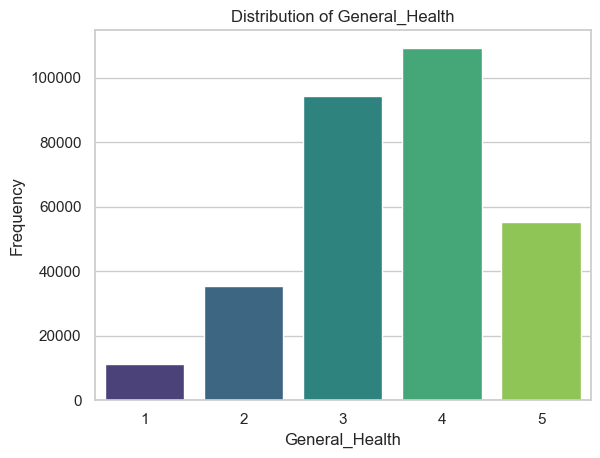

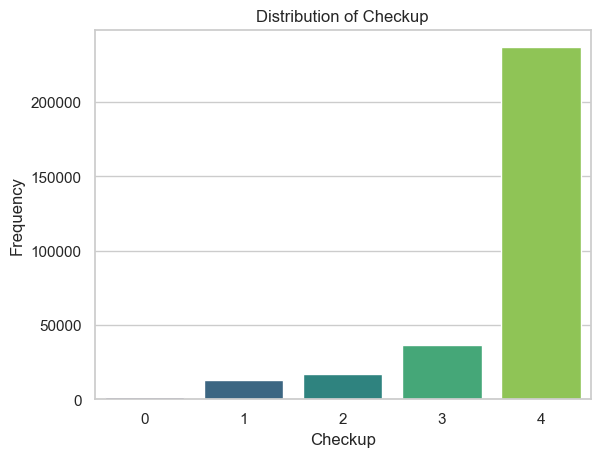

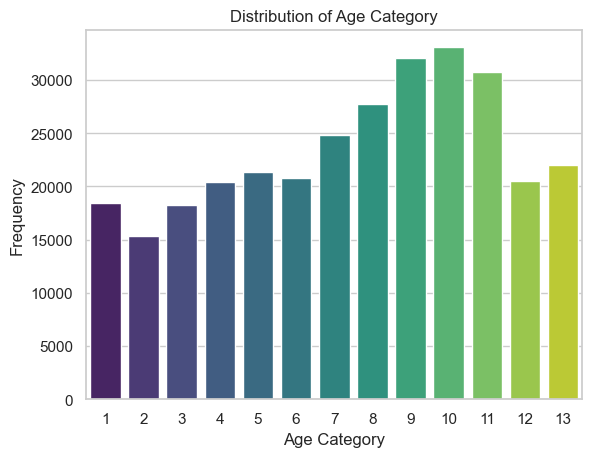

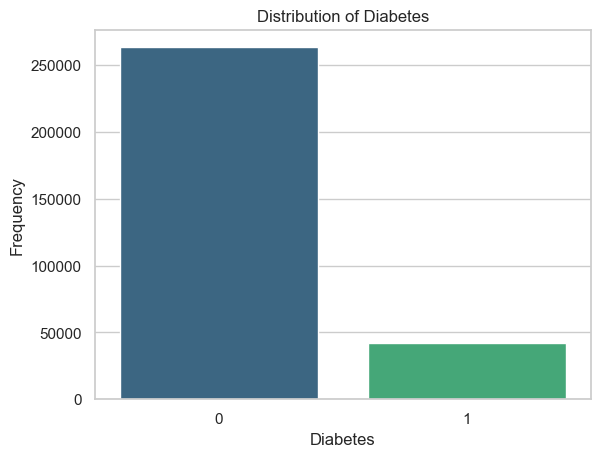

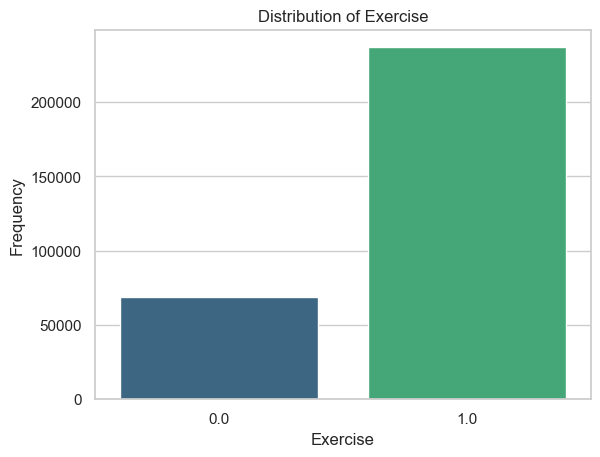

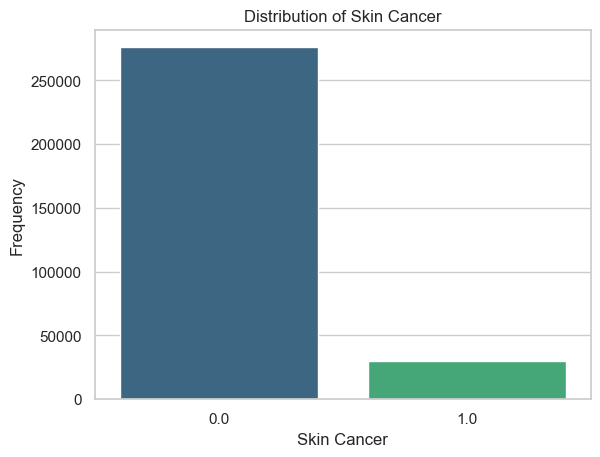

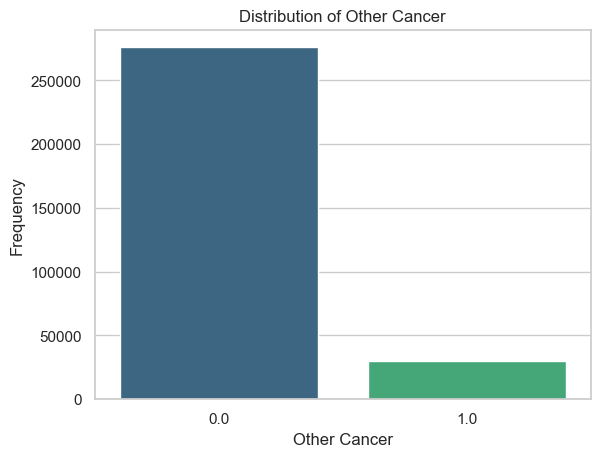

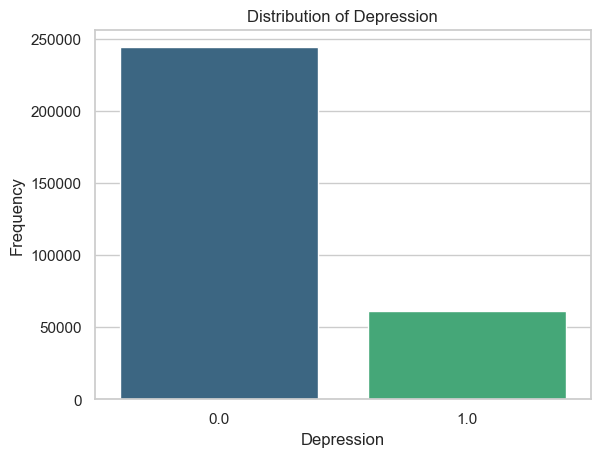

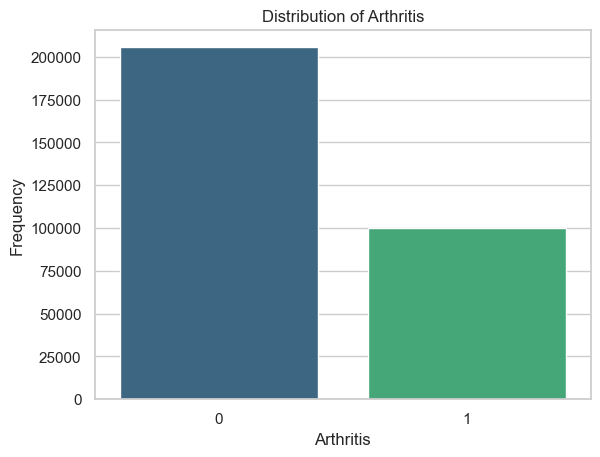

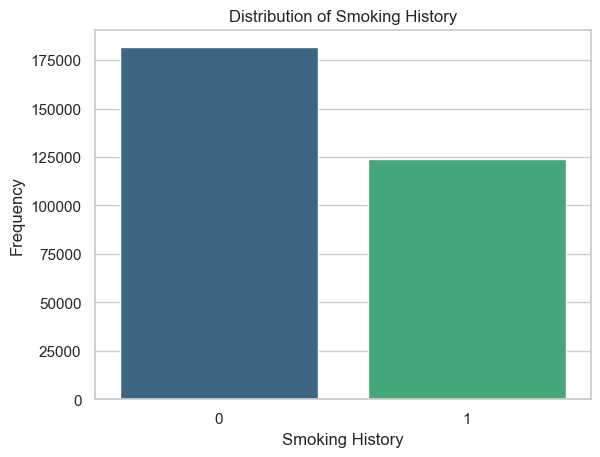

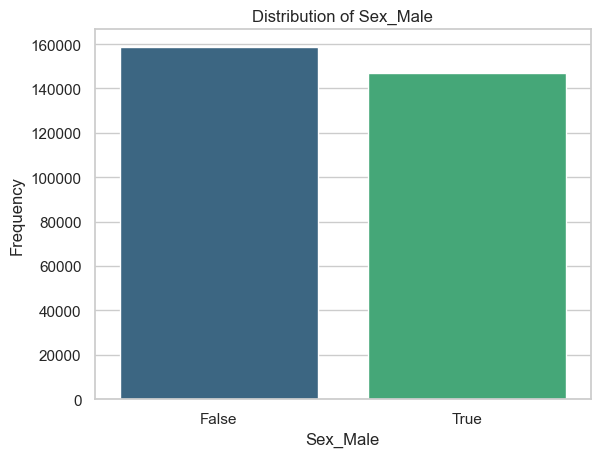

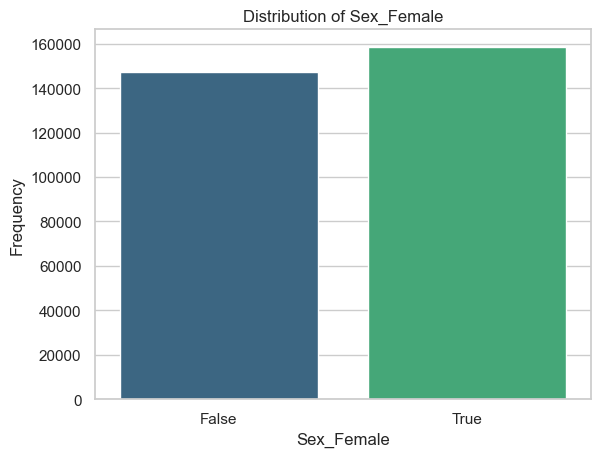

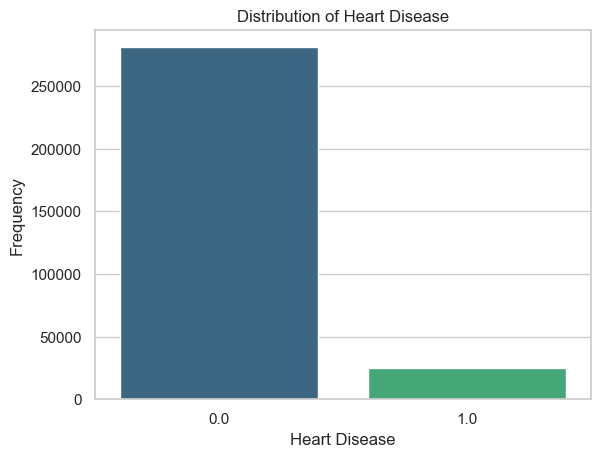

In [52]:
#Frecuency plot of "General_Health" variable
sns.countplot(data=df_clean, x='General_Health', palette="viridis")
plt.title(f'Distribution of {"General_Health"}') #Set the title for the plot
plt.xlabel("General_Health") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Frecuency plot of "Checkup" variable
sns.countplot(data=df_clean, x='Checkup', palette="viridis") 
plt.title('Distribution of Checkup') #Set the title for the plot
plt.xlabel("Checkup") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Frecuency plot of "Age Category" variable
sns.countplot(data=df_clean, x='Age Category', palette="viridis")
plt.title('Distribution of Age Category') #Set the title for the plot
plt.xlabel("Age Category") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Frecuency plot of "Diabetes" variable
sns.countplot(data=df_clean, x='Diabetes', palette="viridis")
plt.title('Distribution of Diabetes') #Set the title for the plot
plt.xlabel("Diabetes") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Frecuency plot of "Exercise" variable
sns.countplot(data=df_clean, x='Exercise', palette="viridis")
plt.title('Distribution of Exercise') #Set the title for the plot
plt.xlabel("Exercise") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Frecuency plot of "Skin Cancer" variable
sns.countplot(data=df_clean, x='Skin Cancer', palette="viridis")
plt.title('Distribution of Skin Cancer') #Set the title for the plot
plt.xlabel("Skin Cancer") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Frecuency plot of "Other Cancer" variable
sns.countplot(data=df_clean, x='Other Cancer', palette="viridis")
plt.title('Distribution of Other Cancer') #Set the title for the plot
plt.xlabel("Other Cancer") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Frecuency plot of "Depression" variable
sns.countplot(data=df_clean, x='Depression', palette="viridis")
plt.title('Distribution of Depression') #Set the title for the plot
plt.xlabel("Depression") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Frecuency plot of "Arthritis" variable
sns.countplot(data=df_clean, x='Arthritis', palette="viridis")
plt.title('Distribution of Arthritis') #Set the title for the plot
plt.xlabel("Arthritis") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Frecuency plot of "Smoking History" variable
sns.countplot(data=df_clean, x='Smoking History', palette="viridis")
plt.title('Distribution of Smoking History') #Set the title for the plot
plt.xlabel("Smoking History") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Frecuency plot of "Sex_Male" variable
sns.countplot(data=df_clean, x='Sex_Male', palette="viridis")
plt.title('Distribution of Sex_Male') #Set the title for the plot
plt.xlabel("Sex_Male") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Frecuency plot of "Sex_Female" variable
sns.countplot(data=df_clean, x='Sex_Female', palette="viridis")
plt.title('Distribution of Sex_Female') #Set the title for the plot
plt.xlabel("Sex_Female") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Frecuency plot of "Heart Disease" variable
sns.countplot(data=df_clean, x='Heart Disease', palette="viridis")
plt.title('Distribution of Heart Disease') #Set the title for the plot
plt.xlabel("Heart Disease") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

### Numerical values

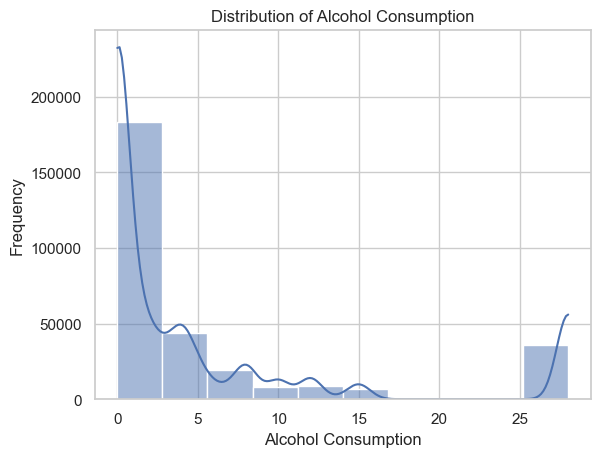

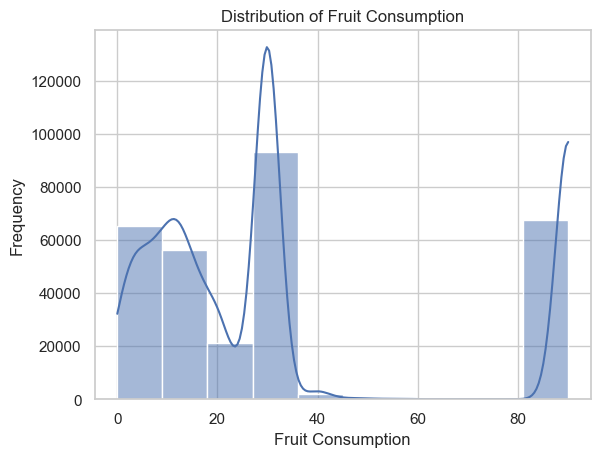

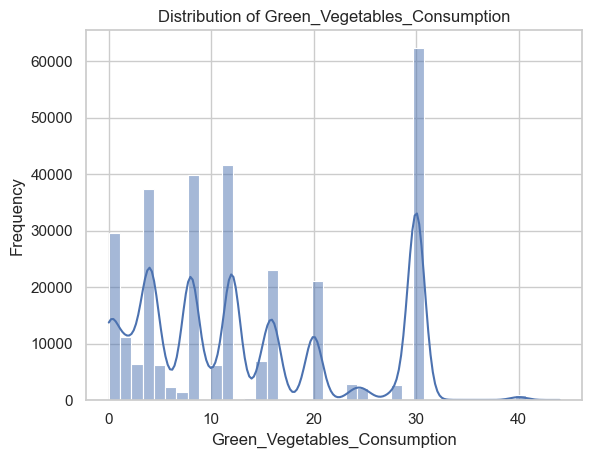

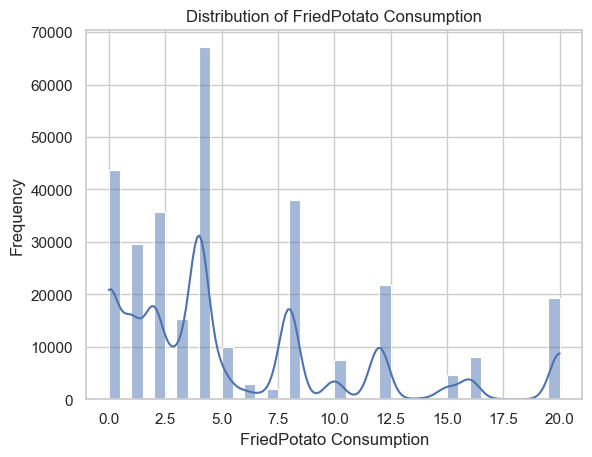

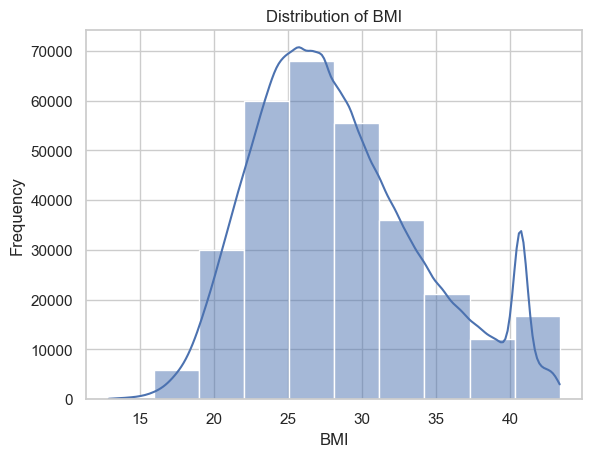

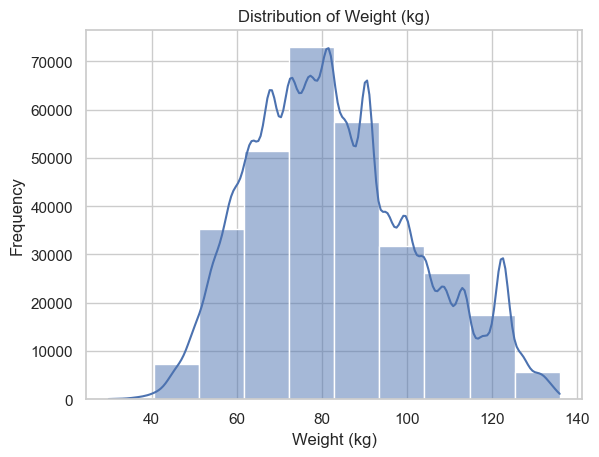

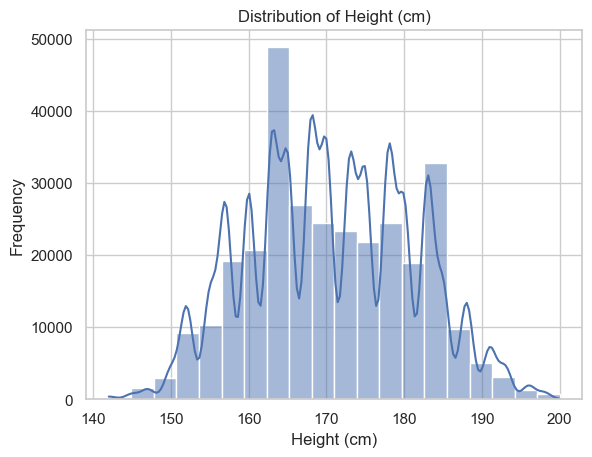

In [53]:
#Histogram for the "Alcohol Consumption" variable
#kde=True adds a smooth curve representing the distribution density
#bins=10 intervals set arbitrarily
sns.histplot(data=df_clean, x='Alcohol Consumption', kde=True, bins=10)
plt.title('Distribution of Alcohol Consumption') #Set the title for the plot
plt.xlabel("Alcohol Consumption") #Set the abel for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Histogram for the "Fruit Consumption" variable
#kde=True adds a smooth curve representing the distribution density
#bins=10 intervals set arbitrarily
sns.histplot(data=df_clean, x='Fruit Consumption', kde=True, bins=10)
plt.title('Distribution of Fruit Consumption') #Set the title for the plot
plt.xlabel("Fruit Consumption") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Histogram for the "Green_Vegetables_Consumption" variable
#kde=True adds a smooth curve representing the distribution density
#bins=40 intervals set arbitrarily
sns.histplot(data=df_clean, x='Green_Vegetables_Consumption', kde=True, bins=40)
plt.title('Distribution of Green_Vegetables_Consumption') #Set the title for the plot
plt.xlabel("Green_Vegetables_Consumption") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Histogram for the "FriedPotato Consumption" variable
#kde=True adds a smooth curve representing the distribution density
#bins=40 intervals set arbitrarily
sns.histplot(data=df_clean, x='FriedPotato Consumption', kde=True, bins=40)
plt.title('Distribution of FriedPotato Consumption') #Set the title for the plot
plt.xlabel("FriedPotato Consumption") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Histogram for the "BMI" variable
#kde=True adds a smooth curve representing the distribution density
#bins=10 intervals set arbitrarily
sns.histplot(data=df_clean, kde=True, x='BMI', bins=10)
plt.title('Distribution of BMI') #Set the title for the plot
plt.xlabel("BMI") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Histogram for the "Weight (kg)" variable
#kde=True adds a smooth curve representing the distribution density
#bins=10 intervals set arbitrarily
sns.histplot(data=df_clean, kde=True, x='Weight (kg)', bins=10)
plt.title('Distribution of Weight (kg)') #Set the title for the plot
plt.xlabel("Weight (kg)") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

#Histogram for the "Height (cm)" variable
#kde=True adds a smooth curve representing the distribution density
#bins=10 intervals set arbitrarily
sns.histplot(data=df_clean, kde=True, x='Height (cm)', bins=20)
plt.title('Distribution of Height (cm)') #Set the title for the plot
plt.xlabel("Height (cm)") #Set the label for the x-axis
plt.ylabel('Frequency') #Set the label for the y-axis
plt.show() #Display the plot

# 3. Divide the dataset in a training, validation, and test set. Make sure that the distributions in the training, validation, and test set are similar (provide a graph with the number of observations on each class for the three sets). Justify the percentage of observations assigned to each dataset using literature (include references to a paper or books to justify the percentage selected, class slides or internet blogs are not a valid reference).

In [13]:
# Assign predictor variables and the response variable to different variables

# xvar: Contains the predictor variables
xvar = df_clean[["General_Health", "Checkup", "Exercise", "Skin Cancer", "Other Cancer", "Depression", 
                 "Diabetes", "Arthritis", "Age Category", "Height (cm)", "Weight (kg)", "BMI", 
                 "Smoking History", "Alcohol Consumption", "Fruit Consumption", "Green_Vegetables_Consumption", 
                 "FriedPotato Consumption", "Sex_Female", "Sex_Male"]]

# yvar: Contains the response variable ("Heart Disease")
yvar = df_clean["Heart Disease"]

#Split the data into a training set (50%) and a temporary set (50%) for further splitting
x_train, x_temp, y_train, y_temp = train_test_split(xvar, yvar, test_size=0.5, random_state=42, stratify=yvar)

#Split the temporary set (50%) into a validation set (25%) and a test set (25%)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

#Print the number of samples in each dataset
print(f"Training set size: {len(x_train)}") #Print size of training set
print(f"Validation set size: {len(x_val)}") #Print size of validation set
print(f"Test set size: {len(x_test)}\n") #Print size of test set

#Set the Seaborn style to "whitegrid" for a clean background
sns.set(style="whitegrid")

#Define a function to create a count plot with annotations
def plot(data, title):
    #Create a count plot for the input data
    ax = sns.countplot(x=data)
    plt.title(title)  #Set the title for the plot

    #Annotate each bar with the count (height) of observations for each category
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', #Convert the height (count) to an integer and format as text
                    (p.get_x() + p.get_width() / 2., p.get_height()), #Position the annotation above each bar
                    ha='center', va='center', #Center the annotation text
                    xytext=(0, 5), #Offset the text vertically by 5 points for readability
                    textcoords='offset points')
    plt.show() #Display the plot

#Plot the distribution of the response variable in each dataset (training, validation, test)
plot(y_train, "Training Set Distribution") #Plot for training set
plot(y_val, "Validation Set Distribution") #Plot for validation set
plot(y_test, "Test Set Distribution") #Plot for test set

Training set size: 152824
Validation set size: 76412
Test set size: 76413



# 4. Implement a machine learning algorithm and statistically prove which of the two techniques researched in point 2 improves the prediction. To statistically prove this point, you must define the null and alternative hypothesis (Ho,Ha) , test statistic, calculate P- value, and draw a conclusion (revise your notes/lectures from Statics class, and select an appropriate test). In the presentation and report the statistical method applied needs to be clearly explained.

In [14]:
#Balance the data using SMOTE and Random Under-sampling
#Create a copy of the original training and validation data
X_train = x_train
y_train = y_train
X_val = x_val
y_val = y_val

#Apply SMOTE (Synthetic Minority Over-sampling Technique) to create a balanced dataset
#SMOTE generates synthetic examples for the minority class to balance class representation
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#Apply Random Under-sampling to create another balanced dataset reducing majority class samples
#This technique randomly removes samples from the majority class to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

#Perform cross-validation with original (unbalanced) training data
#Use a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

#5-fold cross-validation on the original training data
#The variable "cross_val_score" returns an array of accuracy scores for each fold
scores_original = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
#Calculate mean accuracy across the 5 folds
accuracy_original_mean = np.mean(scores_original)
print("Validation Accuracy with Original Data (mean):", round(accuracy_original_mean,4)) #Print accuracy with original data

#Perform cross-validation with SMOTE-balanced training data
#Use a RandomForestClassifier model
model_smote = RandomForestClassifier(random_state=42)

#5-fold cross-validation on the SMOTE-balanced training data
scores_smote = cross_val_score(model_smote, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
#Calculate mean accuracy for the SMOTE-balanced data
accuracy_smote_mean = np.mean(scores_smote)
print("Validation Accuracy with SMOTE (mean):", round(accuracy_smote_mean,4)) #Print accuracy with SMOTE

#Perform cross-validation with under-sampled data
#Use a RandomForestClassifier for the under-sampled data
model_rus = RandomForestClassifier(random_state=42)

#5-fold cross-validation on the under-sampled training data
scores_rus = cross_val_score(model_rus, X_train_rus, y_train_rus, cv=5, scoring='accuracy')
#Calculate mean accuracy for the under-sampled data
accuracy_rus_mean = np.mean(scores_rus)
print("Validation Accuracy with Random Under-sampling (mean):", round(accuracy_rus_mean,4)) #Print accuracy with Random Under-sampling 

#Statistical test hypothesis (compare the performance of SMOTE and Random Under-sampling)
print("\nH0: There is no significant difference between SMOTE and Under-sampling in accuracy.") #Null hypothesis
print("H1: There is a significant difference between SMOTE and Under-sampling in accuracy.\n") #Alternative hypothesis

#Perform an independent t-test to compare accuracy scores from SMOTE and under-sampling
t_stat, p_value = stats.ttest_ind(scores_smote, scores_rus)
print("T-statistic:", round(t_stat,4)) #Print t-statistic value
print("P-value:", round(p_value,4)) #Print p-value for the test

#Determine the result of the hypothesis test based on p-value
if p_value < 0.05:
    #Message if p-value is less than 0.05
    print("Reject the null hypothesis. There is a significant difference between the techniques.")
else:
    #Message if p-value is greater than or equal to 0.05
    print("Fail to reject the null hypothesis. No significant difference between the techniques.")

# Display the best training strategy
accuracies = {
    "SMOTE": accuracy_smote_mean,
    "Random Under-sampling": accuracy_rus_mean
}

# Find the strategy with the highest accuracy
best_strategy = max(accuracies, key=accuracies.get)
print("\nBest Strategy:", best_strategy) #Print the name of the best strategy (highest accuracy)
print("Highest Accuracy:", round(accuracies[best_strategy], 4)) #Print the accuracy of the best strategy (highest accuracy)

Validation Accuracy with Original Data (mean): 0.9182
Validation Accuracy with SMOTE (mean): 0.9415
Validation Accuracy with Random Under-sampling (mean): 0.7548

H0: There is no significant difference between SMOTE and Under-sampling in accuracy.
H1: There is a significant difference between SMOTE and Under-sampling in accuracy.

T-statistic: 5.419
P-value: 0.0006
Reject the null hypothesis. There is a significant difference between the techniques.

Best Strategy: SMOTE
Highest Accuracy: 0.9415


# 5. Apply at least 4 machine learning algorithms using the best training strategy found in point 4.

##    5.1 At least 1 algorithm must be an ensemble.
    
##    5.2 At least 1 algorithm must be a model not seen in class (you must research and understand how the model mathematically works and performs the prediction, include a good description about these points in the presentation and report).
   
##    5.3 For at least 2 algorithms apply a hyperparameter optimization method. Mention the range of values in which the hyperparameters are searched.
   
##    5.4 For all hyperparameters of the implemented models (and not optimized) justify the value assigned (read papers or books that provide a recommendation and include the references in the presentation and report). 

In [15]:
# ensemble

# Define base models
base_models = [
    ('log_reg', LogisticRegression(class_weight='balanced', solver='liblinear')),
    ('random_forest', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)),
    ('xgboost', XGBClassifier(scale_pos_weight=10, eval_metric='logloss', random_state=42))
]

# Meta-model
meta_model = LogisticRegression()

# Stacking Classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Train the model on the SMOTE-balanced training set
stacked_model.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_val_pred = stacked_model.predict(x_val)
y_val_prob = stacked_model.predict_proba(x_val)[:, 1]

# Evaluate performance
from sklearn.metrics import classification_report, roc_auc_score
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("AUC Score:", roc_auc_score(y_val, y_val_prob))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     70231
         1.0       0.28      0.11      0.16      6181

    accuracy                           0.91     76412
   macro avg       0.61      0.54      0.56     76412
weighted avg       0.87      0.91      0.89     76412

AUC Score: 0.6467734272910213


In [50]:
# Logistic regression

# penalty= penalty for coefficient values ("l1", "l2", "none")
logit_reg = LogisticRegression(penalty=None, solver='newton-cg')
logit_reg.fit(X_train_smote, y_train_smote)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=xvar.columns).transpose())

# A default probability threshold of 0.5 is used
logit_reg_pred = logit_reg.predict(x_val)

# Returns an array with size (num observations, num classes)
logit_reg_proba = logit_reg.predict_proba(x_val)


logit_result = pd.DataFrame({'actual': y_val, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

classificationSummary(y_train_smote, logit_reg.predict(X_train_smote))
classificationSummary(y_val, logit_reg.predict(x_val))

intercept  0.041426022257582
       General_Health   Checkup  Exercise  Skin Cancer  Other Cancer  \
coeff       -1.283823  0.138982   0.04362     0.280113      0.068398   

       Depression  Diabetes  Arthritis  Age Category  Height (cm)  \
coeff    0.325636  -0.60208  -0.586488       0.34039    -0.047032   

       Weight (kg)       BMI  Smoking History  Alcohol Consumption  \
coeff     0.037085 -0.093681        -0.446832             -0.01043   

       Fruit Consumption  Green_Vegetables_Consumption  \
coeff          -0.000421                      0.004364   

       FriedPotato Consumption  Sex_Female  Sex_Male  
coeff                -0.021589    7.408807   8.63935  
Confusion Matrix (Accuracy 0.8170)

       Prediction
Actual      0      1
     0 113923  26540
     1  24875 115588
Confusion Matrix (Accuracy 0.7939)

       Prediction
Actual     0     1
     0 56948 13283
     1  2463  3718


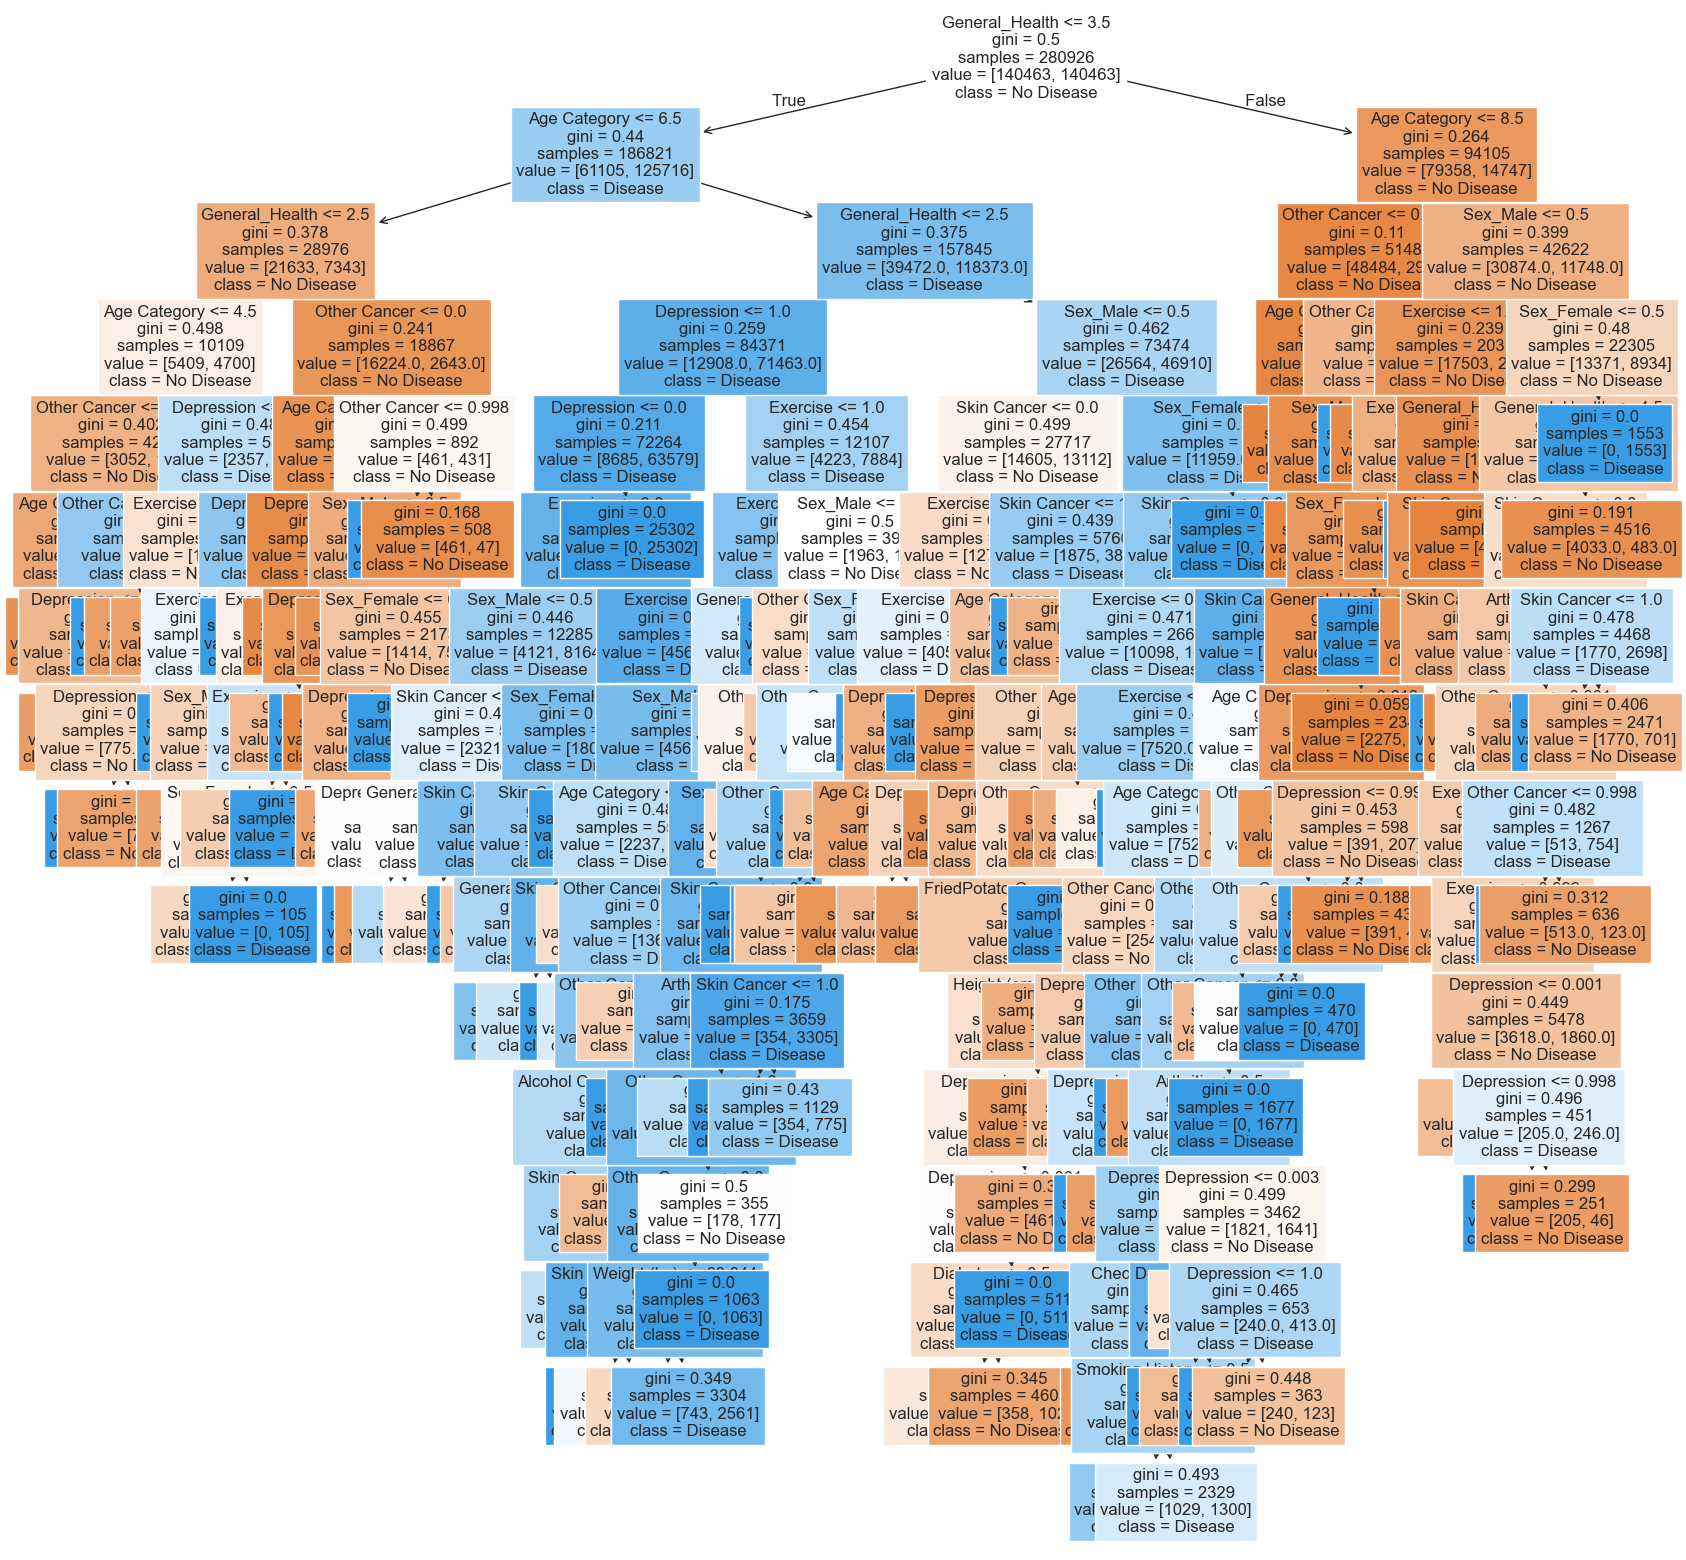

Confusion Matrix (Accuracy 0.8764)

       Prediction
Actual      0      1
     0 130634   9829
     1  24902 115561
Confusion Matrix (Accuracy 0.8813)

       Prediction
Actual     0     1
     0 65389  4842
     1  4229  1952


In [45]:
# Decision tree

# We create a Tree with a defined stop criteria
smallClassTree = DecisionTreeClassifier(max_depth=31, 
                    min_samples_split=98, min_impurity_decrease=0.00014132610439434811) 
smallClassTree.fit(X_train_smote, y_train_smote)

plt.figure(figsize=(20, 20))  
tree.plot_tree(
    smallClassTree, 
    feature_names=X_train_smote.columns,  # Replace with your feature names if available
    class_names=["No Disease", "Disease"],  # Replace with your class names
    fontsize=12,
    filled=True  # Add colors for better readability
)
plt.show()

classificationSummary(y_train_smote, smallClassTree.predict(X_train_smote))

classificationSummary(y_val, smallClassTree.predict(x_val))

In [18]:
# Naive Bayes Classifier

# Start the Naive Bayes classifier
nb_model = GaussianNB()

# Fit the model on the SMOTE-balanced training set
nb_model.fit(X_train_smote, y_train_smote)

# Predict on the validation set
y_val_pred = nb_model.predict(x_val)
y_val_prob = nb_model.predict_proba(x_val)[:, 1]  # Probability for the positive class

# Evaluate the model
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     70231
         1.0       0.19      0.75      0.30      6181

    accuracy                           0.72     76412
   macro avg       0.58      0.73      0.56     76412
weighted avg       0.91      0.72      0.78     76412

Confusion Matrix:
 [[50051 20180]
 [ 1522  4659]]


In [20]:
# Grid Search

# Specify the hyperparameters and values to test
param_grid = {
    'penalty': ['l1', 'l2', None],  # Regularization methods
    'solver': ['lbfgs', 'newton-cg'],  # Solvers compatible with penalties
}

# Apply Grid Search using cross-validation
gridSearch = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # Optimize for classification accuracy
    cv=5,
    verbose=1,
    n_jobs=-1
)
gridSearch.fit(X_train_smote, y_train_smote)

# Display the results
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

# Evaluate the best estimator on the validation set
best_logistic = gridSearch.best_estimator_
logistic_predictions = best_logistic.predict(x_val)

# Evaluation
print("Logistic Regression Results:")
print("Accuracy on validation set:", accuracy_score(y_val, logistic_predictions))
print("Classification Report:\n", classification_report(y_val, logistic_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_val, logistic_predictions))


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/mariapaula/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mariapaula/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Best score:  0.8153607970394396
Best parameters:  {'penalty': 'l2', 'solver': 'newton-cg'}
Logistic Regression Results:
Accuracy on validation set: 0.7938543684238077
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.81      0.88     70231
         1.0       0.22      0.60      0.32      6181

    accuracy                           0.79     76412
   macro avg       0.59      0.71      0.60     76412
weighted avg       0.90      0.79      0.83     76412

Confusion Matrix:
 [[56940 13291]
 [ 2461  3720]]


In [51]:
# Optimized logistic regression

# penalty= penalty for coefficient values ("l1", "l2", "none")
logit_reg = LogisticRegression(penalty='l2', solver='newton-cg')
logit_reg.fit(X_train_smote, y_train_smote)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=xvar.columns).transpose())

# A default probability threshold of 0.5 is used
logit_reg_pred = logit_reg.predict(x_val)

# Returns an array with size (num observations, num classes)
logit_reg_proba = logit_reg.predict_proba(x_val)


logit_result = pd.DataFrame({'actual': y_val, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

classificationSummary(y_train_smote, logit_reg.predict(X_train_smote))
classificationSummary(y_val, logit_reg.predict(x_val))

intercept  1.0896947297971358
       General_Health   Checkup  Exercise  Skin Cancer  Other Cancer  \
coeff       -1.282853  0.138706  0.043475     0.280117      0.068671   

       Depression  Diabetes  Arthritis  Age Category  Height (cm)  \
coeff    0.325739 -0.601742  -0.586137      0.340149     -0.04691   

       Weight (kg)       BMI  Smoking History  Alcohol Consumption  \
coeff     0.036975 -0.093383        -0.446452            -0.010432   

       Fruit Consumption  Green_Vegetables_Consumption  \
coeff          -0.000421                      0.004361   

       FriedPotato Consumption  Sex_Female  Sex_Male  
coeff                -0.021553    6.341508  7.571162  
Confusion Matrix (Accuracy 0.8170)

       Prediction
Actual      0      1
     0 113917  26546
     1  24858 115605
Confusion Matrix (Accuracy 0.7939)

       Prediction
Actual     0     1
     0 56940 13291
     1  2461  3720


In [46]:
# Random Search

# Specify the hyperparameter space and values to test
param_distributions = {
    'max_depth': randint(3, 10),  # Smaller maximum depth for fewer splits
    'min_samples_split': randint(50, 200),  # Larger range ensures nodes split only with sufficient data
    'min_impurity_decrease': uniform(0.001, 0.01)  # Restrict impurity thresholds to a small, meaningful range
}

# Apply random search using cross-validation as error measure
randomSearch = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_distributions,
    n_iter=100,  # Number of random configurations to try
    cv=5,  # 5-fold cross-validation
    random_state=42,  # For reproducibility
    verbose=1,
    n_jobs=-1  # Parallel processing
)

# Fit the random search
randomSearch.fit(X_train_smote, y_train_smote)

# Display the results
print('Best score after random search: ', randomSearch.best_score_)
print('Best parameters after random search: ', randomSearch.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best score after random search:  0.8109468750769864
Best parameters after random search:  {'max_depth': 8, 'min_impurity_decrease': 0.001070663052197174, 'min_samples_split': 138}


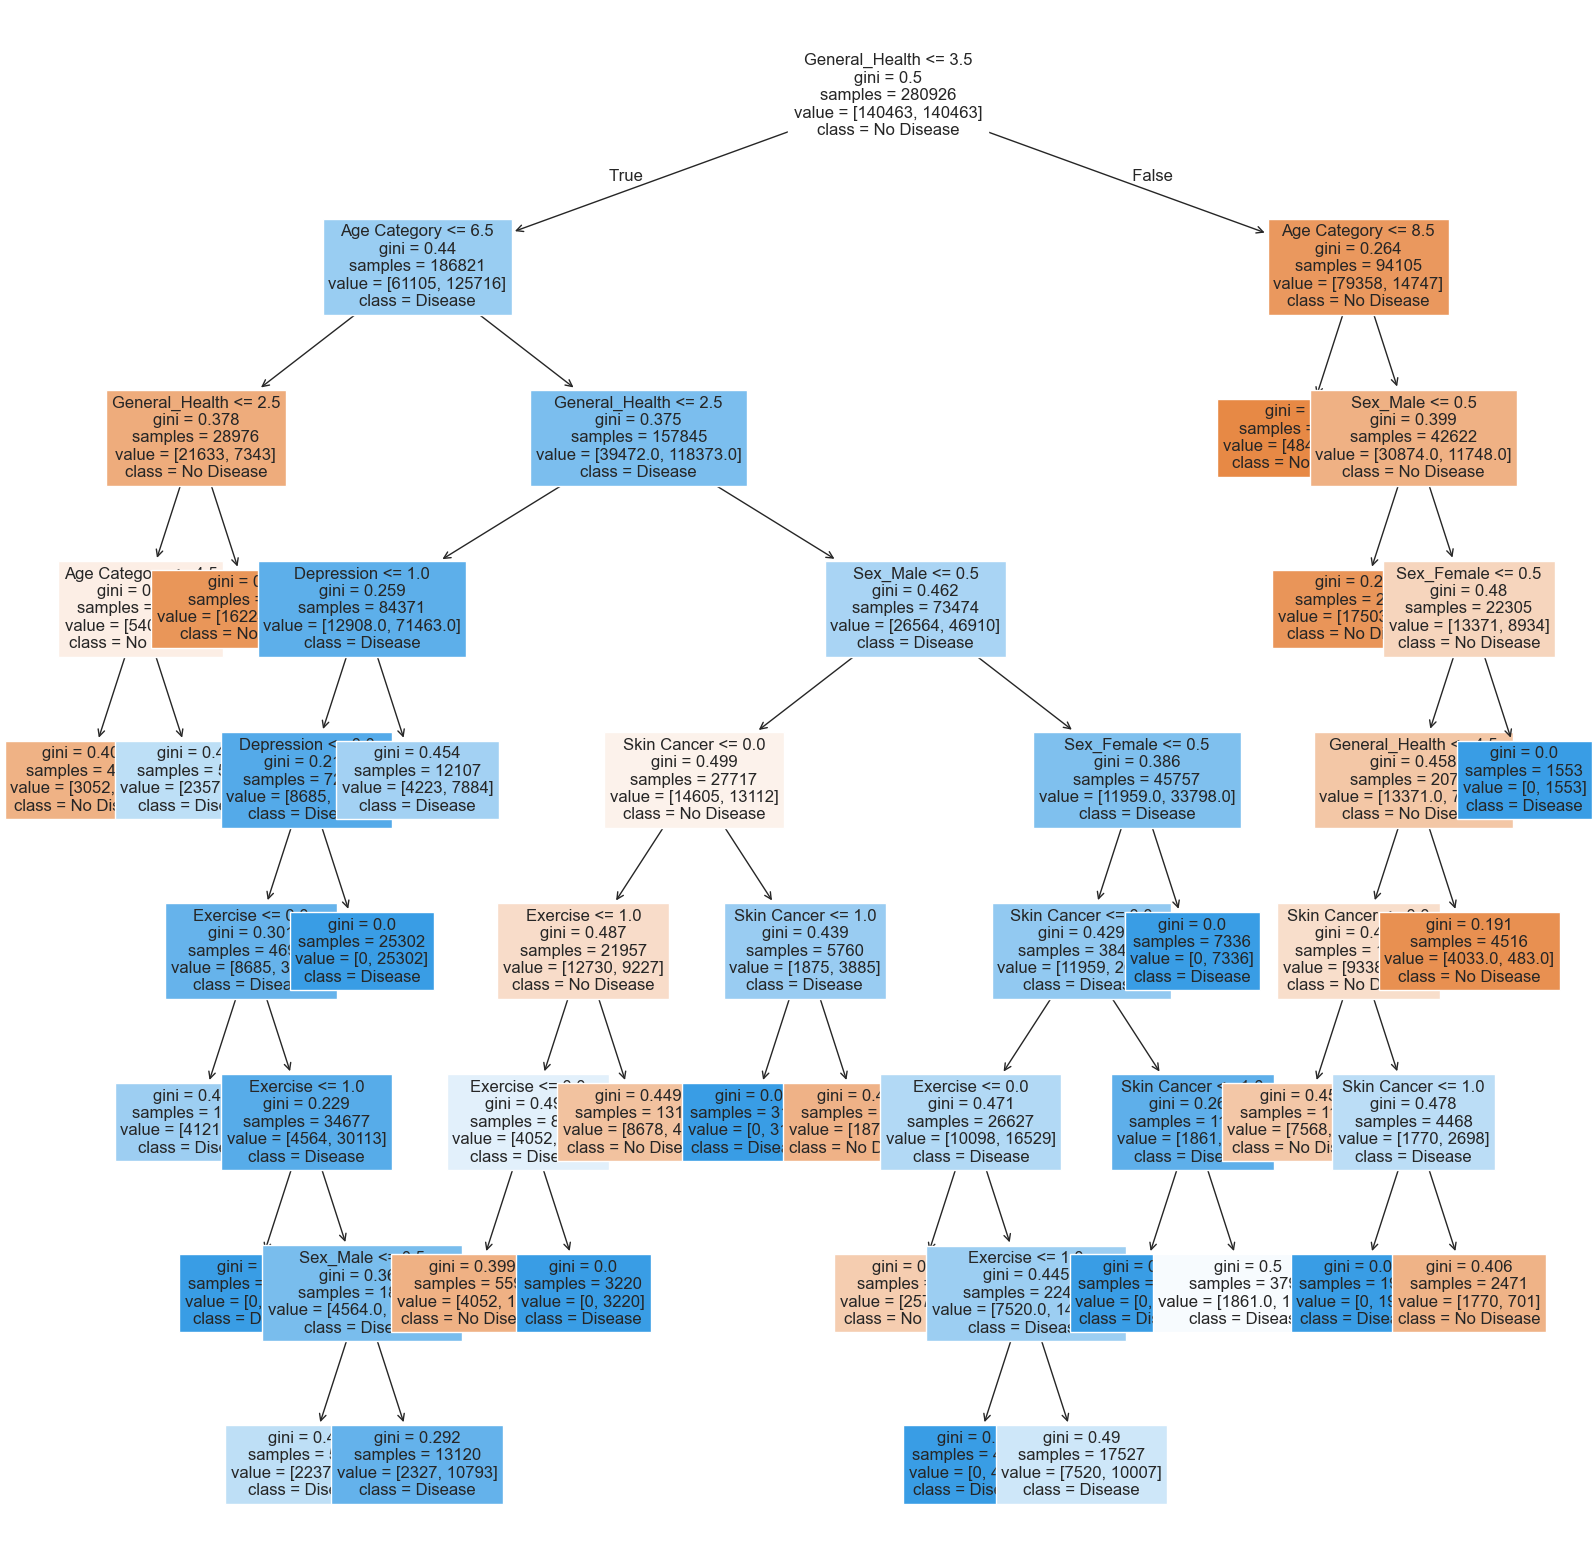

Confusion Matrix (Accuracy 0.8293)

       Prediction
Actual      0      1
     0 115817  24646
     1  23308 117155
Confusion Matrix (Accuracy 0.8046)

       Prediction
Actual     0     1
     0 57966 12265
     1  2668  3513


In [47]:
# Optimized decision tree

# We create a Tree with a defined stop criteria
smallClassTree = DecisionTreeClassifier(max_depth=8, 
                    min_samples_split=138, min_impurity_decrease=0.001070663052197174) 
smallClassTree.fit(X_train_smote, y_train_smote)

plt.figure(figsize=(20, 20))  
tree.plot_tree(
    smallClassTree, 
    feature_names=X_train_smote.columns,  # Replace with your feature names if available
    class_names=["No Disease", "Disease"],  # Replace with your class names
    fontsize=12,
    filled=True  # Add colors for better readability
)
plt.show()

classificationSummary(y_train_smote, smallClassTree.predict(X_train_smote))

classificationSummary(y_val, smallClassTree.predict(x_val))

# 6. Evaluate each model

## 6.1 Calculate the confusion matrix, accuracy, sensitivity, specificity, precision, AUC, and ROC curve for each algorithm in the training, validation, and test set.

## 6.2 Considering the costs of each type of error in this problem, select and justify the most adequate evaluation metric.

## 6.3 Select and justify the best algorithm using the evaluation metric selected and its performance in the training, validation, and test set. Analyze if the model is underfitting, overfitting, or just right.

In [29]:
# create a function to evaluate the model
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # create a subfunction to calculate the evaluation metrics
    def calculate_metrics(y_true, y_pred, y_prob):
        cm = confusion_matrix(y_true, y_pred) # confusion matrix
        accuracy = accuracy_score(y_true, y_pred) # accuracy score
        precision = precision_score(y_true, y_pred, zero_division=0) # precision score
        sensitivity = recall_score(y_true, y_pred)  # sensitivity score (same as recall)
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0 # specificity score
        auc = roc_auc_score(y_true, y_prob) # auc score
        return cm, accuracy, sensitivity, specificity, precision, auc

    # create a subfunction to print the metrics
    def print_metrics(name, metrics):
        cm, accuracy, sensitivity, specificity, precision, auc = metrics
        print(f"--- {name} Metrics ---")
        print(f"Confusion Matrix:\n{cm}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Sensitivity (Recall): {sensitivity:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"AUC: {auc:.4f}")
        print()

    # create a subfunction to plot the ROC curve
    def plot_roc(y_true, y_prob, name):
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_true, y_prob):.4f})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend(loc="lower right")

    # Apply the subfunctions on the training set
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]
    train_metrics = calculate_metrics(y_train, y_train_pred, y_train_prob)
    print_metrics("Training", train_metrics)

    # Apply the subfunctions on the validation set
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)[:, 1]
    val_metrics = calculate_metrics(y_val, y_val_pred, y_val_prob)
    print_metrics("Validation", val_metrics)

    # Apply the subfunctions on the test set
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]
    test_metrics = calculate_metrics(y_test, y_test_pred, y_test_prob)
    print_metrics("Test", test_metrics)

    # Show the ROC curve plots
    plt.figure(figsize=(10, 6))
    plot_roc(y_train, y_train_prob, "Training")
    plot_roc(y_val, y_val_prob, "Validation")
    plot_roc(y_test, y_test_prob, "Test")
    plt.show()

--- Training Metrics ---
Confusion Matrix:
[[140460      3]
 [     3 140460]]
Accuracy: 1.0000
Sensitivity (Recall): 1.0000
Specificity: 1.0000
Precision: 1.0000
AUC: 1.0000

--- Validation Metrics ---
Confusion Matrix:
[[68444  1787]
 [ 5471   710]]
Accuracy: 0.9050
Sensitivity (Recall): 0.1149
Specificity: 0.9746
Precision: 0.2843
AUC: 0.6468

--- Test Metrics ---
Confusion Matrix:
[[68429  1803]
 [ 5484   697]]
Accuracy: 0.9046
Sensitivity (Recall): 0.1128
Specificity: 0.9743
Precision: 0.2788
AUC: 0.6409



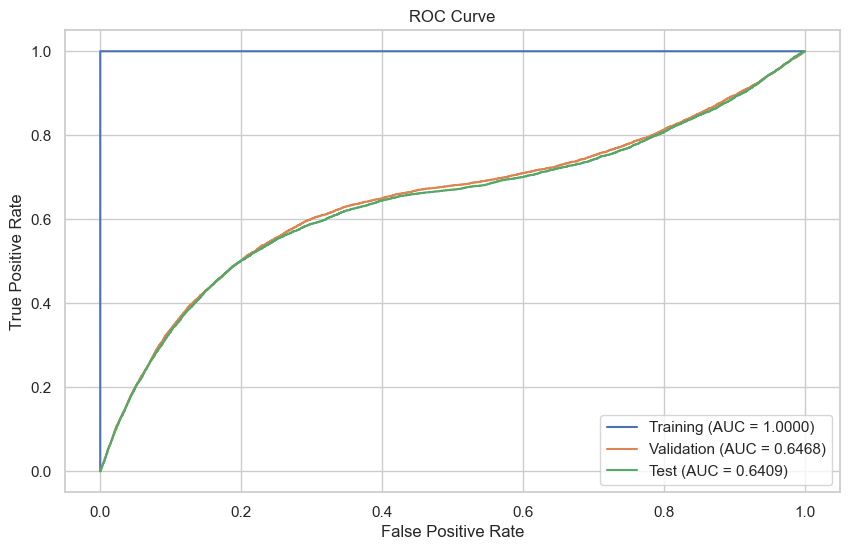

In [30]:
# apply evaluation function on the ensamble (stacked model)
evaluate_model(
    stacked_model, X_train_smote, y_train_smote, x_val, y_val, x_test, y_test)

--- Training Metrics ---
Confusion Matrix:
[[113917  26546]
 [ 24858 115605]]
Accuracy: 0.8170
Sensitivity (Recall): 0.8230
Specificity: 0.8110
Precision: 0.8133
AUC: 0.8995

--- Validation Metrics ---
Confusion Matrix:
[[56940 13291]
 [ 2461  3720]]
Accuracy: 0.7939
Sensitivity (Recall): 0.6018
Specificity: 0.8108
Precision: 0.2187
AUC: 0.7967

--- Test Metrics ---
Confusion Matrix:
[[57148 13084]
 [ 2470  3711]]
Accuracy: 0.7964
Sensitivity (Recall): 0.6004
Specificity: 0.8137
Precision: 0.2210
AUC: 0.7971



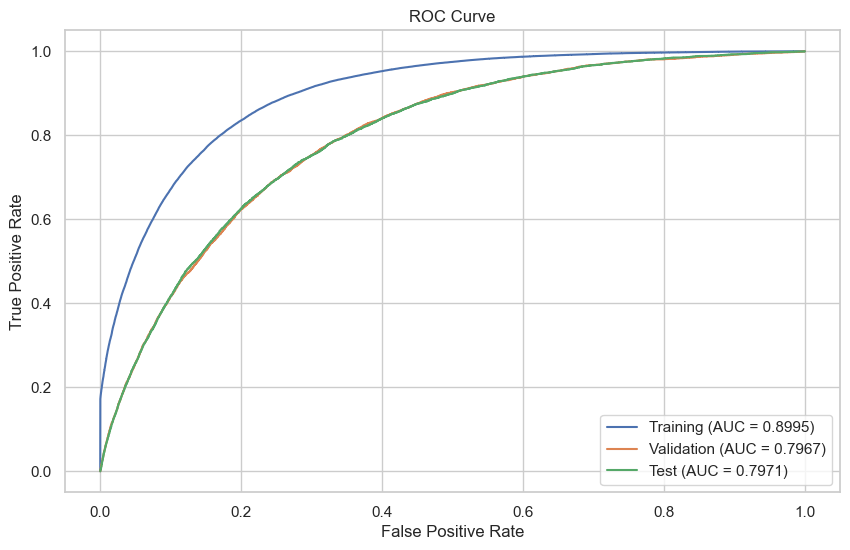

In [32]:
# apply evaluation function on the logistic regression model
evaluate_model(
    logit_reg, X_train_smote, y_train_smote, x_val, y_val, x_test, y_test
)

--- Training Metrics ---
Confusion Matrix:
[[130634   9829]
 [ 24902 115561]]
Accuracy: 0.8764
Sensitivity (Recall): 0.8227
Specificity: 0.9300
Precision: 0.9216
AUC: 0.9481

--- Validation Metrics ---
Confusion Matrix:
[[65389  4842]
 [ 4229  1952]]
Accuracy: 0.8813
Sensitivity (Recall): 0.3158
Specificity: 0.9311
Precision: 0.2873
AUC: 0.7966

--- Test Metrics ---
Confusion Matrix:
[[65479  4753]
 [ 4196  1985]]
Accuracy: 0.8829
Sensitivity (Recall): 0.3211
Specificity: 0.9323
Precision: 0.2946
AUC: 0.7984



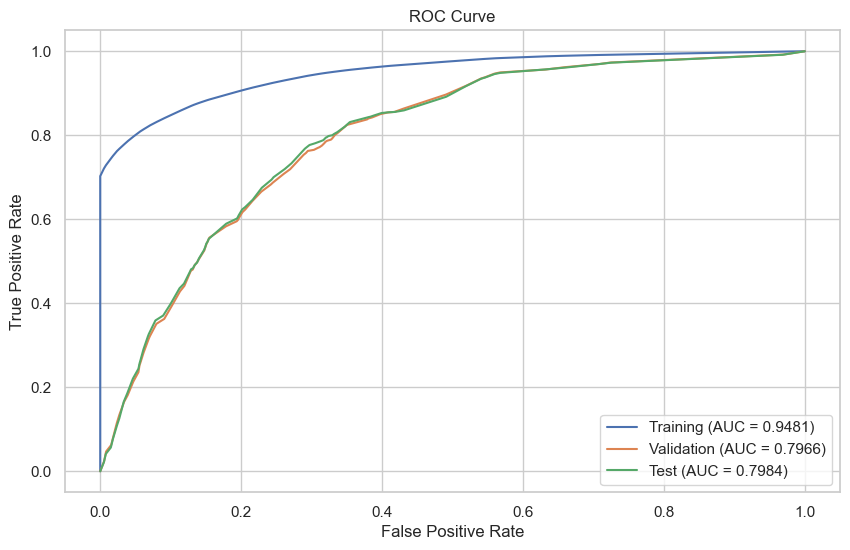

In [33]:
# apply evaluation function on the Desicion Tree Classifier
evaluate_model(
    smallClassTree, X_train_smote, y_train_smote, x_val, y_val, x_test, y_test
)

--- Training Metrics ---
Confusion Matrix:
[[100030  40433]
 [ 25702 114761]]
Accuracy: 0.7646
Sensitivity (Recall): 0.8170
Specificity: 0.7121
Precision: 0.7395
AUC: 0.8263

--- Validation Metrics ---
Confusion Matrix:
[[50051 20180]
 [ 1522  4659]]
Accuracy: 0.7160
Sensitivity (Recall): 0.7538
Specificity: 0.7127
Precision: 0.1876
AUC: 0.8018

--- Test Metrics ---
Confusion Matrix:
[[49928 20304]
 [ 1532  4649]]
Accuracy: 0.7142
Sensitivity (Recall): 0.7521
Specificity: 0.7109
Precision: 0.1863
AUC: 0.8012



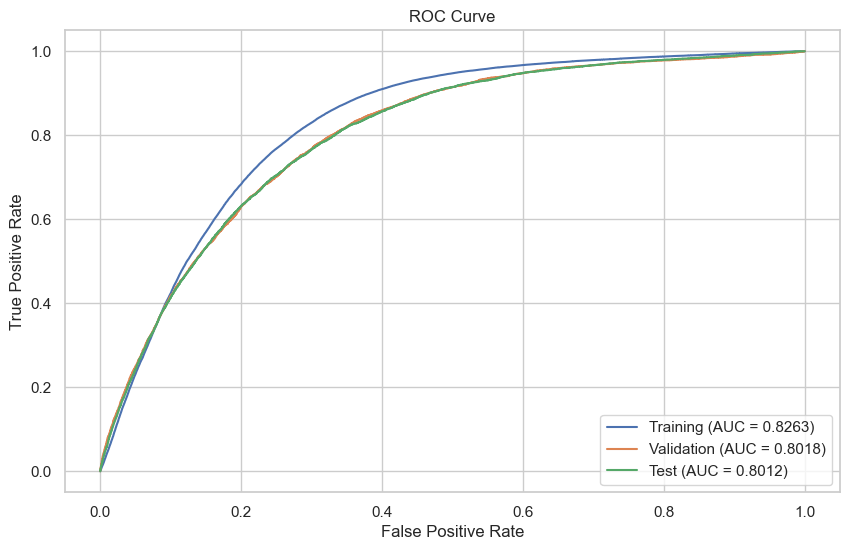

In [34]:
# apply evaluation function on the Naive Bayes model
evaluate_model(
    nb_model, X_train_smote, y_train_smote, x_val, y_val, x_test, y_test
)

## 6.4 Investigate how a random forest can be used to identify the most important predictor variables (feature selection). Using this random forest-based method, mention which predictor variables are the most important to predict a cardiovascular disease. Compare the result with the correlation analysis. In the presentation and report explain the method utilized. 

                         Feature  Importance
0                 General_Health    0.178109
8                   Age Category    0.129350
2                       Exercise    0.115080
5                     Depression    0.071485
4                   Other Cancer    0.063257
3                    Skin Cancer    0.061654
11                           BMI    0.054202
10                   Weight (kg)    0.053095
9                    Height (cm)    0.045604
15  Green_Vegetables_Consumption    0.036472
14             Fruit Consumption    0.035853
18                      Sex_Male    0.034993
16       FriedPotato Consumption    0.034450
13           Alcohol Consumption    0.027410
17                    Sex_Female    0.021139
1                        Checkup    0.011204
7                      Arthritis    0.009740
12               Smoking History    0.009286
6                       Diabetes    0.007619


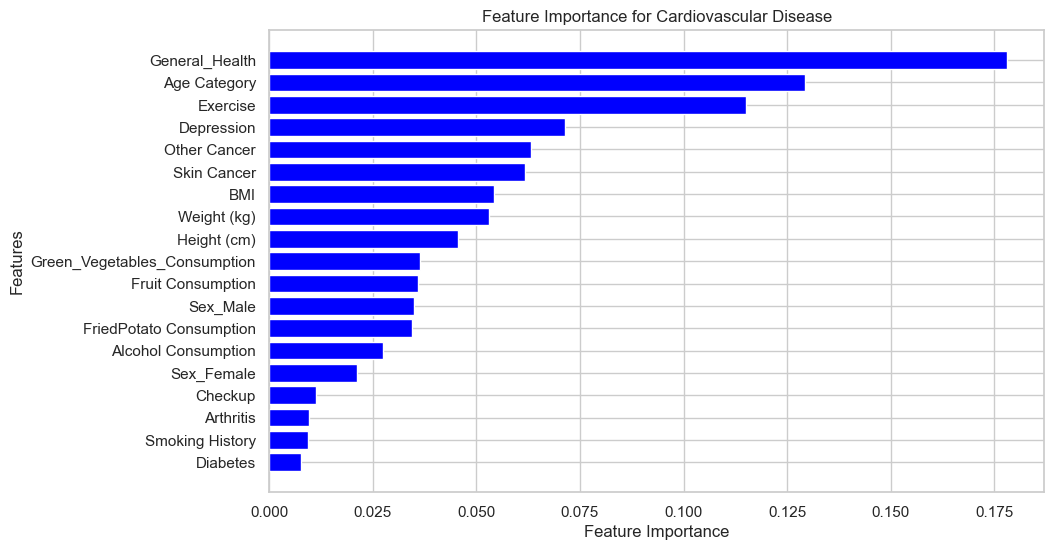

In [43]:
# start a random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X_train_smote, y_train_smote)

# Following code obtained from: https://www.geeksforgeeks.org/feature-selection-using-random-forest/

# Extract feature (variable) importances from the model
importances = rf.feature_importances_
feature_names = xvar.columns # each predictor variable is a feature
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}) # create new df with feature importance

# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Select top 5 features
top_features = feature_importance_df['Feature'][:5].values
X_train_selected = X_train_smote[top_features]
X_test_selected = x_test[top_features]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Cardiovascular Disease")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

## References

Breiman, L. (2001). Random forests. Machine Learning, 45, 5–32. https://doi.org/10.1023/A:1010933404324

Cao, L., & Shen, H. (2020). CSS  : Handling imbalanced data by improved clustering with stratified sampling. Concurrency and Computation: Practice and Experience. doi:10.1002/cpe.6071

Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic minority over-sampling technique. Journal of Artificial Intelligence Research, 16, 321–357. https://doi.org/10.1613/jair.953

Field, A. (2013). Discovering statistics using IBM SPSS statistics. SAGE Publications.

GeeksforGeeks. (2024, May 28). Feature selection using Random Forest. GeeksforGeeks. https://www.geeksforgeeks.org/feature-selection-using-random-forest/

GeeksforGeeks. (2023, Feb 06). XGBoost. GeeksforGeeks. https://www.geeksforgeeks.org/xgboost/

Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90–95. https://doi.org/10.1109/MCSE.2007.55

Kluyver, T., Ragan-Kelley, B., Pérez, F., Granger, B. E., Bussonnier, M., Frederic, J., ... & Willing, C. (2016). Jupyter Notebooks—a publishing format for reproducible computational workflows. In Positioning and Power in Academic Publishing: Players, Agents and Agendas (pp. 87–90). https://doi.org/10.3233/978-1-61499-649-1-87

Liu, X.-Y., Wu, J., & Zhou, Z.-H. (2009). Exploratory under-sampling for class-imbalance learning. IEEE Transactions on Systems, Man, and Cybernetics - Part B: Cybernetics, 39(2), 539–550. https://doi.org/10.1109/TSMCB.2008.2007853

McKinney, W. (2010). Data structures for statistical computing in Python. Proceedings of the 9th Python in Science Conference, 56–61. https://doi.org/10.25080/Majora-92bf1922-00a

Nafis, N. (2023, January 24). The story behind ‘random.seed(42)’ in machine learning. Medium. https://medium.com/geekculture/the-story-behind-random-seed-42-in-machine-learning-b838c4ac290a

OpenAI. (2024). ChatGPT (version GPT-4) [Language model]. “Elaboration of a model evaluation fucntion”. https://chatgpt.com/share/674ffda0-9454-8005-bfae-360603980b62

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

Peng, R. D. (2011). Reproducible research in computational science. Science, 334(6060), 1226–1227. https://doi.org/10.1126/science.1213847

Shmueli, G., Bruce, P. C., & Patel, N. R. (2016). Data Mining for Business Analytics (3rd ed.) [PDF]. John Wiley & Sons, Inc.

Sklearn.metrics. (n.d.). Scikit-learn. https://scikit-learn.org/1.5/api/sklearn.metrics.html

Stone, M. (1974). Cross-validatory choice and assessment of statistical predictions. Journal of the Royal Statistical Society: Series B (Methodological, 36(2), 111–133. https://doi.org/10.1111/j.2517-6161.1974.tb00994.x

Student. (1908). The probable error of a mean. Biometrika, 6(1), 1–25. https://doi.org/10.2307/2331554

Waskom, M. L. (2021). Seaborn: Statistical data visualization. Journal of Open Source Software, 6(60), 3021. https://doi.org/10.21105/joss.03021

World Health Organization. (2000). Obesity: Preventing and Managing the Global Epidemic: Report of a WHO Consultation. WHO Technical Report Series.

Amazon Web Services. (n.d.). EC2 Pricing. Retrieved from https://aws.amazon.com

Amershi, S., et al. (2019). Software Engineering for Machine Learning: A Case Study. International Conference on Software Engineering.

Burtch Works. (2022). Salaries of Data Scientists and Predictive Analytics Professionals. Retrieved from https://www.burtchworks.com

Google Cloud. (n.d.). Compute Engine Pricing. Retrieved from https://cloud.google.com

Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

Drummond, C., & Holte, R. C. (2006). Cost Curves: An Improved Method for Evaluating Classifiers. Machine Learning, 65(1), 95–130

Krizhevsky, A., et al. (2012). ImageNet Classification with Deep Convolutional Neural Networks. Advances in Neural Information Processing Systems